# TQDB API 範例 (Python版)
首先我們自定義連結TQDB取出報價資料的函數
* 預設Series作為資料輸出格式，也可以選擇DataFrame
* 資料主機的位置，我們先預設為本機IP：127.0.0.1


In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import requests
import datetime
import urllib
from  pandas import DataFrame,Series
# Define function to fetch remote data # demonstartion only #
def TQDB(symbol='DEMO1',startDate='2014-6-30',endDate='2035-7-01',type='Series',server='127.0.0.1'):
    querystr={'symbol':symbol, 'BEG':startDate, 'END': endDate}
    url = "http://"+server+"/cgi-bin/q1min.py?"+urllib.urlencode(querystr)
    r = requests.get(url)
    lines = r.content.split('\n')
    x = []
    H=[]
    L=[]
    C=[]
    O=[]
    Vol=[]
    i=0
    for line in lines:
        i=i+1
        items=line.split(',')
        if len(items) < 5:
            continue
        dt=datetime.datetime.strptime(items[0]+items[1], '%Y%m%d%H%M%S')
        x.append(dt)

        C.append(float(items[5]))
        L.append(float(items[4]))
        H.append(float(items[3]))
        O.append(float(items[2]))
        Vol.append(float(items[6]))
    d = {'O' :O,'H':H,'L':L,'C':C,'Vol':Vol}
    if len(O)==0:
        print "no data available. Please select different date"
        return
    if type=="DataFrame":
        return DataFrame(d,index=x, columns=['O','H','L','C','Vol'])
    elif type=="Series":
        return Series(C,index=x)
    else:
        print 'type is not defined'


In [16]:
s='2015-07-1'
e='2035-12-1'
a=TQDB("DEMO1",type='Series',startDate=s,endDate=e)
b=TQDB("DEMO2",type='Series',startDate=s,endDate=e)
c=TQDB("DEMO3",type='Series',startDate=s,endDate=e)

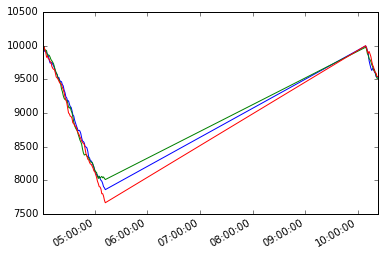

In [18]:
# (a)['C'].plot()#blue
ee="2016-2-18"
a[ee].plot()
b[ee].plot()
c[ee].plot()
#a.plot()
#a.to_csv('SPY.csv')
# b.plot()#Green
# c.plot()#red

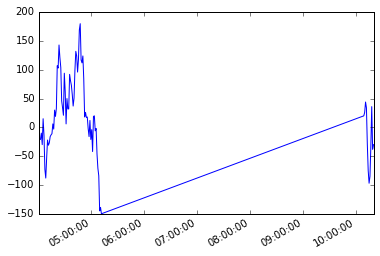

In [4]:
(a-b).plot()#blue
#b.plot()#Green

In [5]:
s='2014-5-2'
e='2035-7-3'
stw=TQDB("DEMO1",type='Series',startDate=s,endDate=e)
tx=TQDB("DEMO2",type='Series',startDate=s,endDate=e)

In [6]:
p=1.5*30*stw-tx*2

In [7]:
p

2016-02-18 04:01:00    429433
2016-02-18 04:02:00    428582
2016-02-18 04:03:00    426260
2016-02-18 04:04:00    426798
2016-02-18 04:05:00    425468
2016-02-18 04:06:00    424526
2016-02-18 04:07:00    423522
2016-02-18 04:08:00    420609
2016-02-18 04:09:00    418773
2016-02-18 04:10:00    418800
2016-02-18 04:11:00    419421
2016-02-18 04:12:00    418070
2016-02-18 04:13:00    417132
2016-02-18 04:14:00    415606
2016-02-18 04:15:00    413591
2016-02-18 04:16:00    412305
2016-02-18 04:17:00    411737
2016-02-18 04:18:00    409483
2016-02-18 04:19:00    409764
2016-02-18 04:20:00    407936
2016-02-18 04:21:00    407190
2016-02-18 04:22:00    407252
2016-02-18 04:23:00    405352
2016-02-18 04:24:00    404615
2016-02-18 04:25:00    401862
2016-02-18 04:26:00    400280
2016-02-18 04:27:00    397455
2016-02-18 04:28:00    396657
2016-02-18 04:29:00    394524
2016-02-18 04:30:00    395014
                        ...  
2016-02-18 04:55:00    356375
2016-02-18 04:56:00    356334
2016-02-18

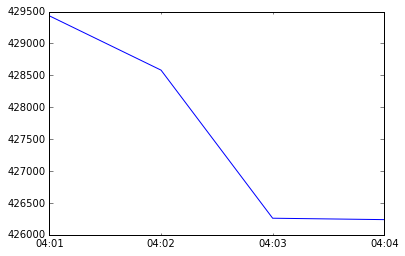

In [8]:
p.plot()